In [2]:
library(gdata)

In [26]:
rate_data <- read.xls('~/Dropbox/Projects_WORKING/BacteriaRates/all_METADATA/metadata_updated_rates.xlsx', 
                      stringsAsFactor = F)

In [27]:
pass_drt <- rate_data$temp_stucture_degree>.5
rates <- log10(rate_data$beast_genomic_rate[pass_drt])
times <- log10(rate_data$sampling_time[pass_drt])
species <- rate_data$species[pass_drt]
rate_data_regression <- data.frame(rate = rates, time = times, species = species)

In [28]:
get_likelihood <- function(data, par){
    rate <- data$rate
    time <- data$time
    alpha <- par[1]
    beta <- par[2]
#    rate_fit <- (1 - alpha*(1-exp(1)^(-beta*time)  ))
    rate_fit <- alpha/(time^beta)
    return(log(mean((rate_fit - rate)^2)))
}

In [29]:
result_mle <- optim(par = c(1, 1), get_likelihood, data = rate_data_regression)

In [30]:
par_frame <- data.frame(alpha = rep(NA, 100), beta=rep(NA, 100))

In [45]:
get_species_sample <- function(){
    species_unique <- names(table(species))
    sapply(species_unique, function(s) sample(which(species==s), 1))
}

In [48]:
par_frame <- data.frame(alpha=rep(NA, 100), beta=rep(NA, 100))
for(i in 1:100){
    n_sample <- get_species_sample()
    boot_data <- rate_data_regression[n_sample, ]
    par_frame[i, ] <- optim(par = c(-5.9, -0.17), get_likelihood, data = boot_data)$par
}

In [53]:
head(par_frame)
write.table(par_frame, 
            '~/Dropbox/Projects_WORKING/BacteriaRates/all_METADATA/curve_fit_bootstrap_sample_spec.csv', row.names = F, sep = ',')

,alpha,beta
1,-5.965452,-0.2566107
2,-5.848984,-0.2172433
3,-6.262005,-0.1609698
4,-6.213892,-0.1906833
5,-6.364849,-0.1406288
6,-6.232431,-0.1839094


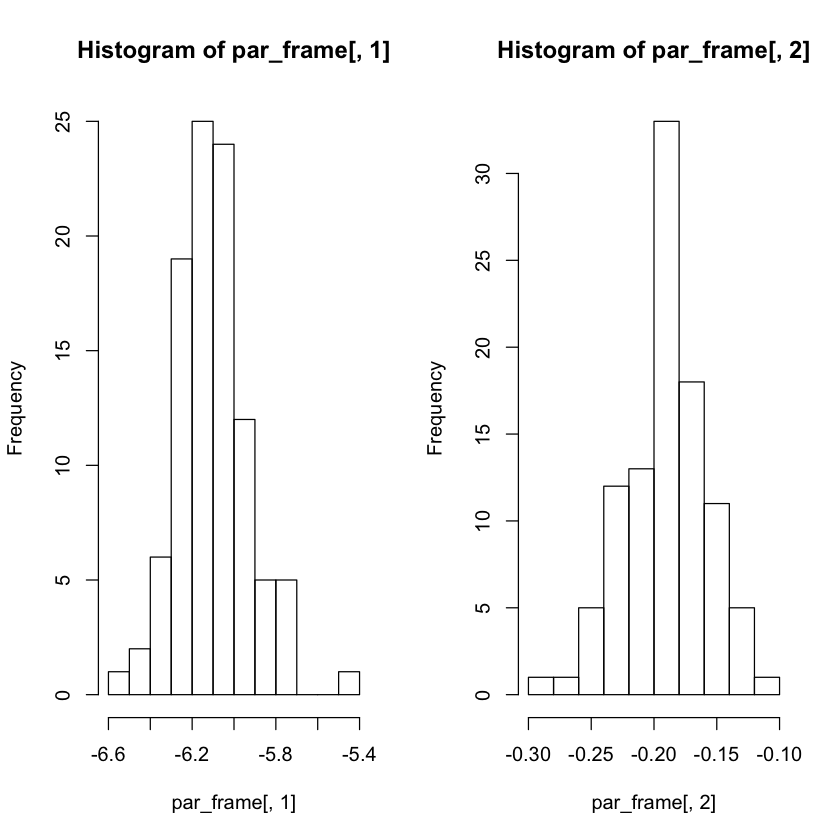

In [51]:
par(mfrow = c(1, 2))
hist(par_frame[, 1])
hist(par_frame[, 2])

In [55]:
quantile(par_frame[, 1], c(0.025, 0.975))
quantile(par_frame[, 2], c(0.025, 0.975))

2.5%     97.5% 
-6.393692 -5.766787

2.5%      97.5% 
-0.2571481 -0.1286812